# Load and display metadata linking options

{
   "@id":"ds-00",
   "@context": {
       "@vocab": "https://schema.org/"
   },
   "@type":"Dataset",
   "name": "Dataset with metadata encoding",
   "description": "Dataset snippet using SO:Encoding pattern for associated XML metadata",
   "license": "https://creativecommons.org/publicdomain/zero/1.0/",
   "identifier": "dataset-00",
   "encoding": {
       "@id":"ds-00#media-object",
       "@type":"MediaObject",
       "contentUrl":"https://my.server.net/datasets/00.xml",
       "dateModified":"2019-10-10T12:43:11+00:00.000",
       "description":"ISO TC211 XML rendering of metadata",
       "encodingFormat":"http://www.isotc211.org/2005/gmd"
   }
}


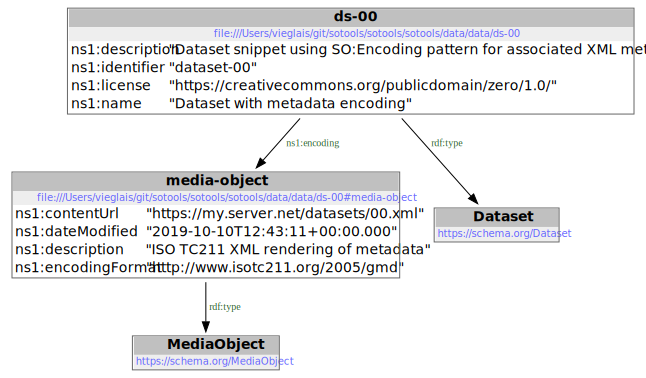

In [9]:
import os
import sotools.common

data_base = "sotools/data/data/"
fname = os.path.join(data_base, "ds_00.json")
print(open(fname).read())
g_00 = sotools.common.loadJsonldGraph(fname)
sotools.common.renderGraph(g_00)

{
  "@context": {
    "@vocab": "https://schema.org/"
  },
  "@graph": [
    {
      "@type": "Dataset",
      "@id": "./",
      "identifier": "dataset-01",
      "name": "Dataset with metadata about",
      "description": "Dataset snippet with metadata and data components indicated by hasPart and the descriptive metadata through an about association.",
      "license": "https://creativecommons.org/publicdomain/zero/1.0/",
      "hasPart": [
        {
          "@id": "./metadata.xml"
        },
        {
          "@id": "./data_part_a.csv"
        }
      ]
    },
    {
      "@id": "./metadata.xml",
      "@type": "MediaObject",
      "contentUrl": "https://example.org/my/data/1/metadata.xml",
      "dateModified": "2019-10-10T12:43:11+00:00.000",
      "description": "A metadata document describing the Dataset and the data component",
      "encodingFormat":"http://www.isotc211.org/2005/gmd",
      "about": [
        {
          "@id": "./"
        },
        {
          "@id": ".

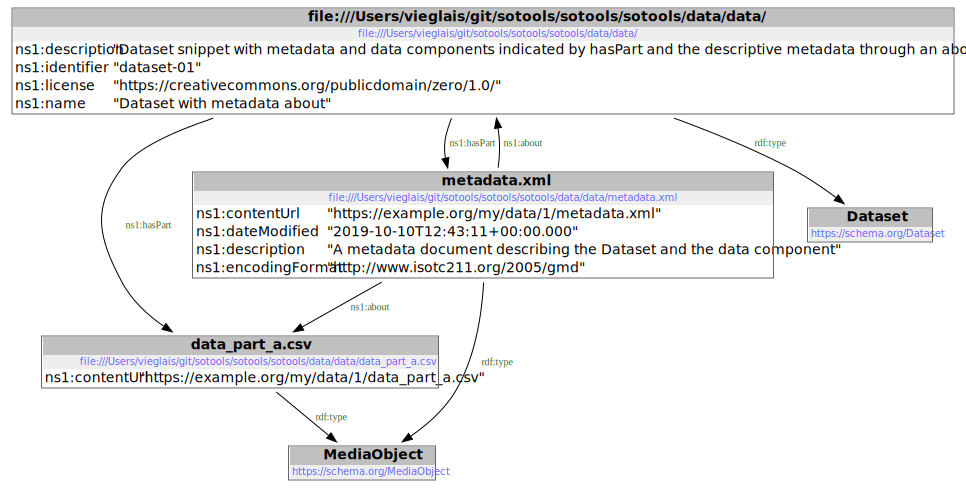

In [10]:
fname = os.path.join(data_base, "ds_01.json")
print(open(fname).read())
g_01 = sotools.common.loadJsonldGraph(filename=fname)
sotools.common.renderGraph(g_01)

{
    "@context": {
        "@vocab": "https://schema.org/",
        "datacite": "http://purl.org/spar/datacite/"
    },
    "@id": "ds-02",
    "url": "https://my.server.org/data/ds-02",
    "@type": "Dataset",
    "identifier": "dataset-02",
    "name": "Dataset subjectOf metadata",
    "description": "Dataset snippet with descriptive metadata indicated through subjectOf relation.",
    "license": "https://creativecommons.org/publicdomain/zero/1.0/",
    "subjectOf": {
        "@id": "ds-02/metadata.xml",
        "@type": "CreativeWork",
        "name": "Dublin Core Metadata Document Describing the Dataset",
        "url": "https://my.server.org/data/ds-02/metadata.xml",
        "encodingFormat": ["application/rdf+xml", "http://ns.dataone.org/metadata/schema/onedcx/v1.0"]
    }
}


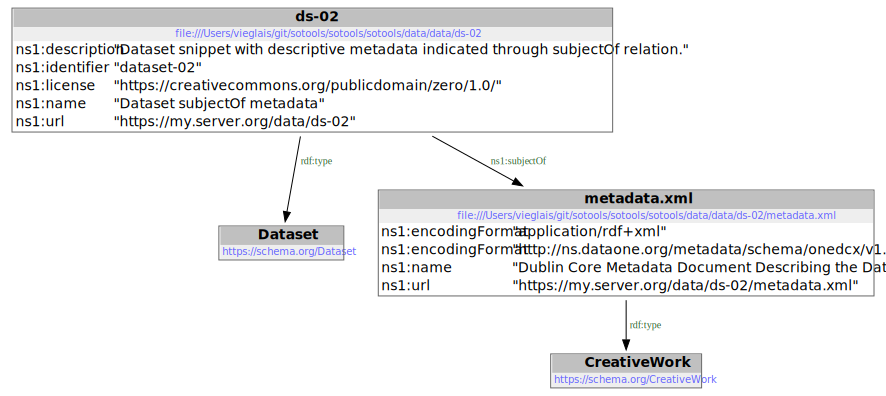

In [11]:
fname = os.path.join(data_base, "ds_02.json")
print(open(fname).read())
g_02 = sotools.common.loadJsonldGraph(filename=fname)
sotools.common.renderGraph(g_02)
